# Task 1: After Normalization

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()


Dataset shape: (2552, 6)

First 5 rows:


,"Flow Depth, D [m]",SLOPE,CHARGE,"Channel Width, B [m]","Particle size, d [m]",Bed Form
0,5.09,0.000204,34721.4,306.0,0.000978,2
1,5.09,0.000098,15114.2,261.0,0.000978,2
2,4.89,0.000077,7200.2,258.0,0.000978,2
3,4.79,0.000066,5243.3,257.0,0.000978,2
4,3.54,0.000348,125324.7,449.2,0.000978,2


In [3]:
print("Missing values:")
print(df.isnull().sum())

df = df.dropna()
print(f"\nDataset shape after removing missing values: {df.shape}")

print("\nData types:")
print(df.dtypes)


Missing values:
Flow Depth, D [m]       4
SLOPE                   4
CHARGE                  0
Channel Width, B [m]    4
Particle size, d [m]    4
Bed Form                0
dtype: int64

Dataset shape after removing missing values: (2548, 6)

Data types:
Flow Depth, D [m]       float64
SLOPE                   float64
CHARGE                   object
Channel Width, B [m]    float64
Particle size, d [m]    float64
Bed Form                  int64
dtype: object


In [4]:
print("Summary Statistics:")
print(df.describe())

print("\nClass Distribution:")
print(df['Bed Form'].value_counts())


Summary Statistics:
       Flow Depth, D [m]         SLOPE  Channel Width, B [m]  \
count        2548.000000  2.548000e+03           2548.000000   
mean            2.718144  5.570980e-04            214.912591   
std             1.794157  6.710274e-04            100.474557   
min             0.080000  5.600000e-09             16.580000   
25%             1.570000  1.799794e-04            157.278756   
50%             2.265822  4.338693e-04            190.683166   
75%             3.492500  8.627090e-04            269.250000   
max            11.000000  2.209983e-02            625.500000   

       Particle size, d [m]     Bed Form  
count           2548.000000  2548.000000  
mean               0.011168     2.043171  
std                0.023022     0.230439  
min                0.000260     2.000000  
25%                0.001112     2.000000  
50%                0.002840     2.000000  
75%                0.013188     2.000000  
max                0.177230     6.000000  

Class Distribut

In [5]:
X = df.drop('Bed Form', axis=1)
y = df['Bed Form']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (2038, 5)
Test set size: (510, 5)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Normalization completed!")
print(f"\nMean of normalized training data:\n{X_train_scaled.mean(axis=0)}")
print(f"\nStd of normalized training data:\n{X_train_scaled.std(axis=0)}")


Normalization completed!

Mean of normalized training data:
[-1.38587212e-16  3.13782366e-17 -2.96350012e-17 -2.42309716e-16
 -8.71617684e-18]

Std of normalized training data:
[1. 1. 1. 1. 1.]


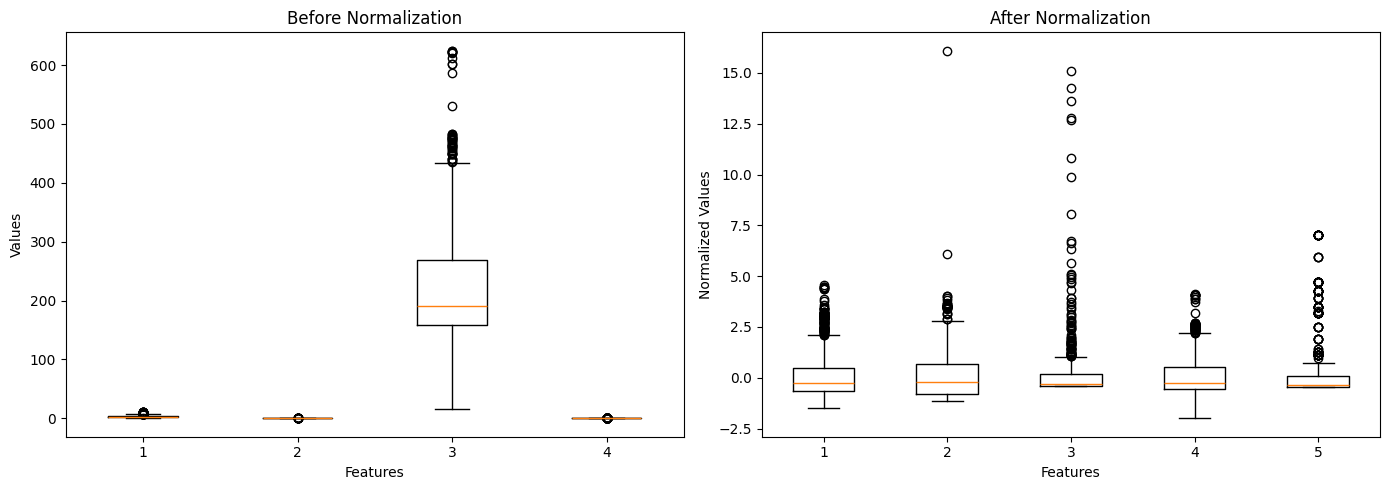

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(X_train.select_dtypes(include=[np.number]).values)
axes[0].set_title('Before Normalization')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Values')

axes[1].boxplot(X_train_scaled)
axes[1].set_title('After Normalization')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Normalized Values')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
print("Model training completed!")

TypeError: MLPClassifier.__init__() got an unexpected keyword argument 'class_weight'

In [ ]:
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, zero_division=0))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9887
Test Accuracy: 0.9843

Classification Report (Test Set):
              precision    recall  f1-score   support

           2       0.99      1.00      0.99       492
           3       0.91      0.67      0.77        15
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.98       510
   macro avg       0.47      0.42      0.44       510
weighted avg       0.98      0.98      0.98       510


Confusion Matrix (Test Set):
[[492   0   0   0]
 [  5  10   0   0]
 [  1   1   0   0]
 [  1   0   0   0]]


In [ ]:
print(f"\nAfter Normalization - Test Accuracy: {test_accuracy:.4f}")


After Normalization - Test Accuracy: 0.9843


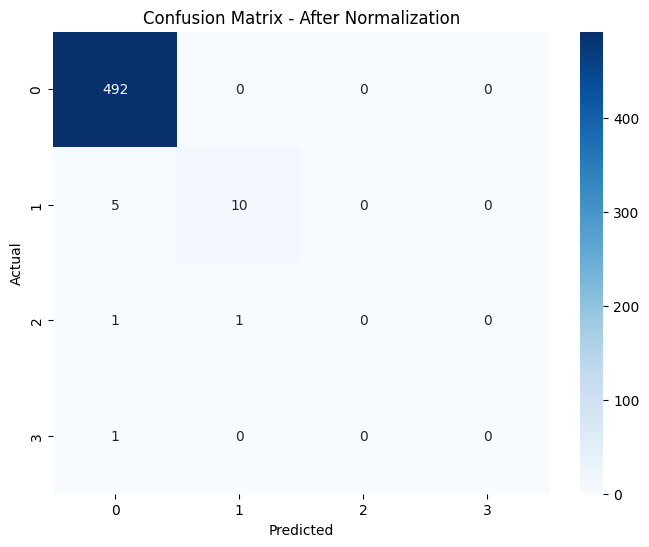

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - After Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
